<h2>Stars and their spectra</h2>
<p><i>A python notebook studying stars in Gaia and SDSS. Written by Niall Deacon (MPIA), with some elements borrowed from a notebook by Rita Tojeiro (St Andrews).</i></p>
<p>Over the past few decades astronomy has seen an avalanche of data from large scale surveys. These surveys allow astronomers to do do large-scale statistical analysis on stars and galaxies, identify rare objects and help to choose targets for large observing facilities like the VLT or JWST.</p>
<p>In this lab we are going to use data from both the Gaia satellite and the Sloan Digital Sky Survey. Gaia measured the positions of billions stars extremely accurately over the course of several years. These measurements were then used to calculate the parallax (relating to how far away a star is) and proper motion (the apparent motion across the sky). The Sloan Digital Sky Survey (SDSS) is a series of ground-based surveys on relatively small telescopes in New Mexico and Chile. SDSS measured the spectra of four million stars, galaxies and exotic objects. Both Gaia and SDSS also measured the brighness of stars in different colours of light.</p>
<br/>
<p>We are going to be using the <a href="https://apps.sciserver.org/compute/">Compute environment</a> on the SDSS SciServer platform. You will need to register for an account on SciServer for this.</a></p>
<br/>
<br/>
<p>OK, let's get started. First we need to import some libraries.</p>

In [2]:
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
import SciServer.SkyServer as SkyServer   # show individual objects and generate thumbnail images through SkyServer
print('SciServer libraries imported')

SciServer libraries imported


In [3]:
import matplotlib.pyplot as plt #used for plotting
import numpy as np
import astropy.io.fits as fits #used for reading FITS table data of SDSS spectra
print('Other libraries imported')

Other libraries imported


<p>Next we are going to query the SDSS database to extract some data. We do this by sending a request to the CASJobs server. </p>
<p>This job is written in Structured Query Language (SQL). SQL is used for a huge number of different databases, not just scientific ones, many large websites run using SQL for databases of products or articles.</p>
<p>There are a few different parts to this SQL query:</p>
<ul>
    <li><b>SELECT</b> which says what parameters you would like returned for each row in the database</li>
    <li><b>FROM</b> the name of the main (or in this case the only) table you are extracting data from</li>
    <li><b>WHERE</b> which restricts the results to only rows in the database matching certain criteria</li>
</ul>
<p>Here we are extracting an ID number for the object, the sky positions (Right Ascension - RA and Declination - Dec), four magnitudes (measures of apparent flux) measured in different colour filters and a couple of statistics relating to the quality of the photometry. We are restricting the search to one patch of the sky (see the restrictions in RA and Dec and to objects brighter than 19th magnitude in the g-band filter. Note we also select objects which have a high probability of being a point source. This means we will exclude fuzzy objects like galaxies. </p>

In [21]:
query="""
SELECT p.objId,p.ra,p.dec,
    p.psfMag_u as u, p.psfMag_g as g, p.psfMag_r as r, p.psfMag_i as i, psfMag_z as z,p.clean,p.probPSF
FROM PhotoObjAll AS p
WHERE  p.probPSF>0.8 
  and p.ra between 180 and 190
  AND p.dec BETWEEN 10 AND 30
  and p.g < 19
"""
all_obj = CasJobs.executeQuery(query, "dr17")


<p>Now let's look at some of the rows in the dataframe we got back from the server</p>

In [22]:
all_obj[0:10]

,objId,ra,dec,u,g,r,i,z,clean,probPSF
0,1237658492817834134,183.723130,10.189403,19.56376,18.60934,18.37632,18.21124,18.27948,0,1
1,1237658492817834135,183.723126,10.189405,19.55420,18.60857,18.37600,18.21089,18.28082,0,1
2,1237658492817834136,183.723126,10.189405,19.56077,18.60969,18.37675,18.21380,18.27919,1,1
3,1237658492817899554,183.939810,10.032878,20.89695,18.75939,17.85957,17.53259,17.41117,0,1
4,1237658492817899557,183.939793,10.032872,20.96136,18.76347,17.86604,17.53466,17.41644,0,1
5,1237658492817965148,183.995401,10.140816,21.41163,18.97910,17.97296,17.57158,17.36438,0,1
6,1237658492817965149,183.995392,10.140817,21.33838,18.97925,17.97383,17.57183,17.36537,1,1
7,1237658492818030597,184.135931,10.197391,16.20785,15.10590,14.70324,14.57699,14.49984,0,1
8,1237658492818030598,184.135927,10.197399,16.20765,15.10589,14.70332,14.57702,14.49986,0,1
9,1237658492818030599,184.135927,10.197399,16.20765,15.10589,14.70332,14.57702,14.49986,1,1


<p>Let's begin examining our data by plotting the sky positions of our objects to check the sky coverage of SDSS in this part of the sky</p>
<h3>Exercise</h3>
<p>Plot the sky positions (RA and Dec) of all the objects in the dataframe <code>all_obj</code>. Use marker '.' and size=1 as there are a lot of points.</p>

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


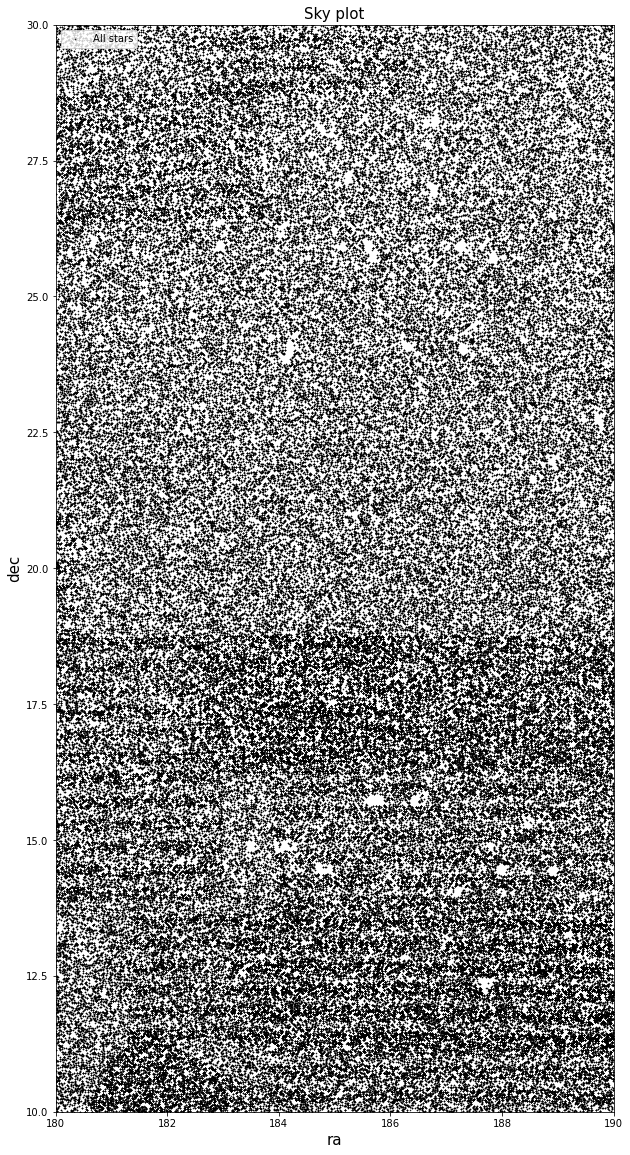

In [23]:
#possible solution
plt.figure(figsize=(10,20))

plt.scatter(all_obj['ra'],all_obj['dec'], color='black', marker='.', s=1, label='All stars')
plt.xlim(180,190)
plt.ylim(10,30)
plt.xlabel('ra', fontsize=15); plt.ylabel('dec', fontsize=15)
plt.title('Sky plot', fontsize=15)
plt.legend()

<p>Did SDSS survey this entire area?</p>
<p>Small gaps in data like this are often caused by bright stars or extended objects like galaxies interfering with the measurements of other stars and galaxies causing them to either not be detected at all or to be detected with distorted parameters.  </p>

<p><b>Possible answer:</b> SDSS is pretty complete here but there are a few small gaps. Some of these line up with large galaxies in the Virgo cluster.</p>

<p>Now let's take a look at the colours of the stars. In astronomy a colour is one magnitude subtracted from another. Typically the magnitude in a redder filter is subtracted from the magnitude in a bluer filter. In this system red objects have larger positive colours and bluer objects have smaller or even negative colours.</p>
<h3>Exercise</h3>
<p>Plot all the stars in the dataframe on a colour-colour plot. This is a scatter plot with one colour as the x-axis and another colour as the y-axis. In this case use the g-r colour for the y-axis with a range of -1 to 3 and the r-i colour for the x-axis with a range of -1 to 3.</p>

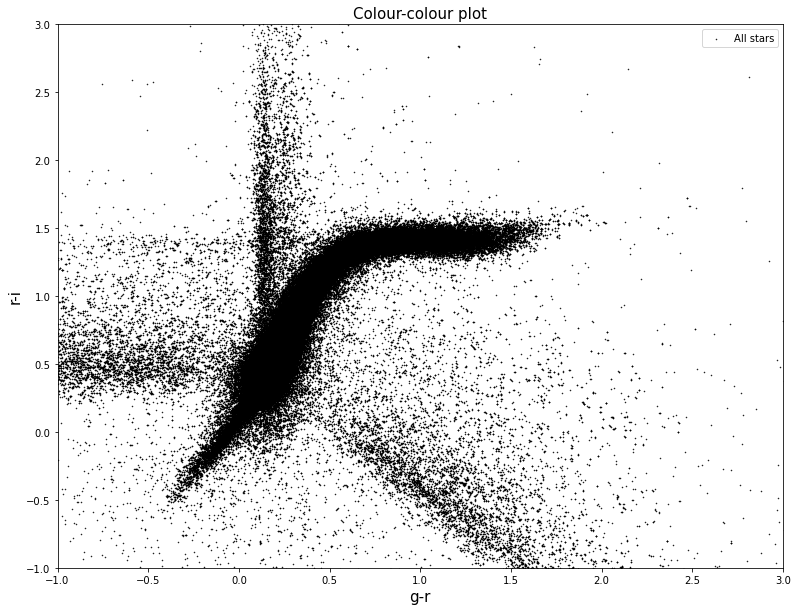

In [24]:
#possible solution

plt.figure(figsize=(13,10))

plt.scatter(all_obj['r']-all_obj['i'],all_obj['g']-all_obj['r'], color='black', marker='.', s=1, label='All stars')
plt.ylim(-1.0,3.0)
plt.xlim(-1.0,3.0)
plt.ylabel('r-i', fontsize=15); plt.xlabel('g-r', fontsize=15)
plt.title('Colour-colour plot', fontsize=15)
plt.legend()

<p>You should be able to see a distinct blob of points (more scientifically called a locus of points) where most of the stars appear. There are probably also a few odd lines jutting out. Can we improve on this diagram?</p>
<p>One thing we can do is plot only stars that have been flagged by the SDSS pipeline as having good photometry. To do this we make a slice of our data, selecting only objects with <code>clean=1</code> using the <code>np.where</code> function.</p>

In [564]:
good_sdss_phot_slice=np.where(all_obj['clean']==1)[0]

<h3>Exercise</h3>
<p>Now remake your colour-colour plot to show only objects in the slice selected above.</p>

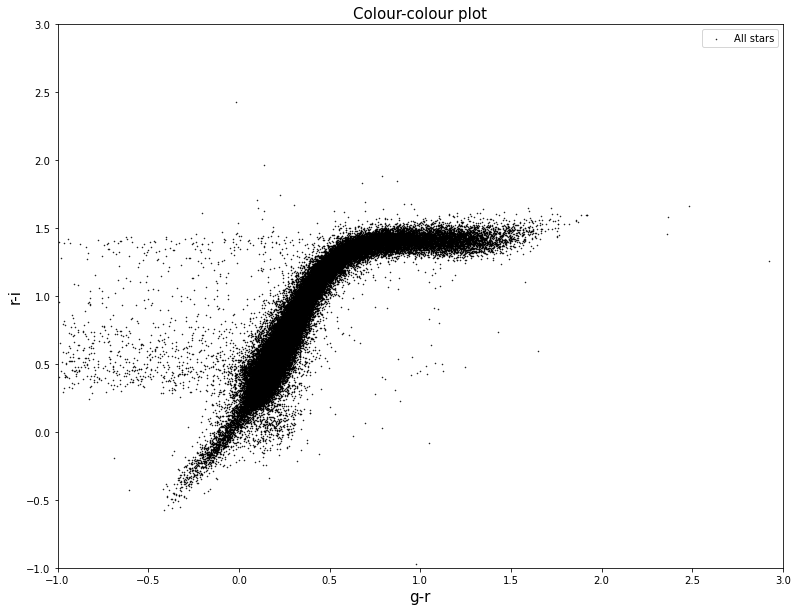

In [565]:
#possible solution

plt.figure(figsize=(13,10))

plt.scatter(all_obj.loc[good_sdss_phot_slice,'r']-all_obj.loc[good_sdss_phot_slice,'i'],all_obj.loc[good_sdss_phot_slice,'g']-all_obj.loc[good_sdss_phot_slice,'r'], color='black', marker='.', s=1, label='All stars')
plt.ylim(-1.0,3.0)
plt.xlim(-1.0,3.0)
plt.ylabel('r-i', fontsize=15); plt.xlabel('g-r', fontsize=15)
plt.title('Colour-colour plot', fontsize=15)
plt.legend()

# <p>Did all of the features from the previous colour-colour plot remain?</p>
<br/>
<p>It's worth noting that when calculating a colour we subtract one magnitude from another. This means that a colour contains information on how bright a star is in one band <b>in comparison</b> to another band. A colour doesn't contain information on how bright a star appears to the observer, or how bright it is in absolute terms.</p>

<h3>Exercise</h3>
<p>Make a colour-magnitude plot with r-i colour on the x-axis and r magnitude on the y axis. Make your plot so that the r magnitude is 10 at the top of the plot and 20 at the bottom of the plot. Use the same plot symbols as before and only plot the stars we previously selected as having good photometry.</p>

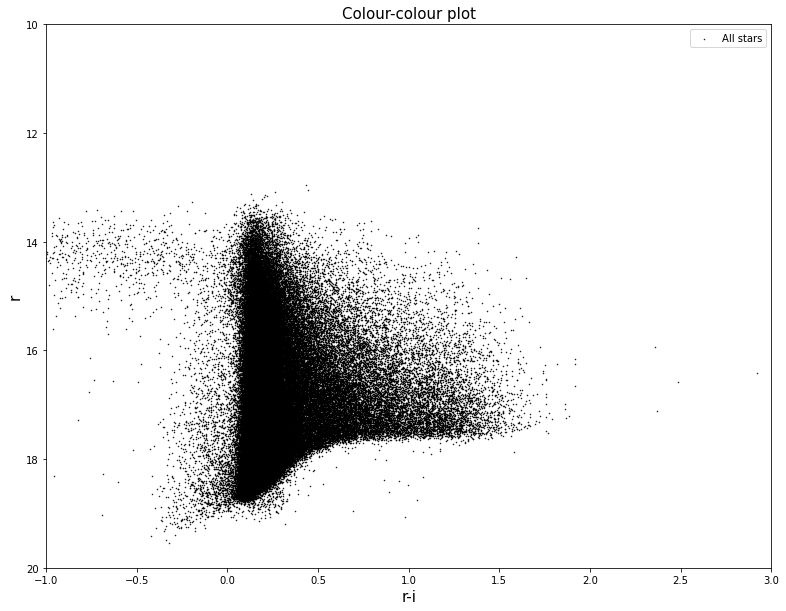

In [569]:
#possible solution

plt.figure(figsize=(13,10))

plt.scatter(all_obj.loc[good_sdss_phot_slice,'r']-all_obj.loc[good_sdss_phot_slice,'i'],all_obj.loc[good_sdss_phot_slice,'r'], color='black', marker='.', s=1, label='All stars')
plt.ylim(20,10)
plt.xlim(-1.0,3.0)
plt.ylabel('r', fontsize=15); plt.xlabel('r-i', fontsize=15)
plt.title('Colour-colour plot', fontsize=15)
plt.legend()

<p>You should have a big locus of points. Note that SDSS photometry saturates at 14 in the both the r and i bands. This means most objects brighter than this will not pass our good photometry cut. 
<ul>    
    <li>Do you notice any other odd features near this limit?</li>
    <li>Do you think they are real or caused by saturation? Hint, think about both saturation in r and i.</li>
</ul>

<p><b>possible answer:</b> there are a bunch of objects at around 14th-15th magnitude with very blue colours. These are likely saturate in r or i and probably don't have reliable photometry.</p>

<p>The plot above shows how bright these stars appear to an observer on Earth. But a dim star close to us might appear to have the same brightness as an intrinsically very bright star far away from us. To solve this we will need more measurements, and for that we turn to the Gaia Satellite.</p>

<h2>Adding Gaia data</h2>
<p>Gaia is a space mission that precisely measured the positions, distances and motions across the sky of over a billion stars in our Galaxy. We will use these distances to calculate how intrinsically bright stars are.</p>
<p>Luckily the SDSS CAS jobs server has Gaia DR2 preloaded and already crossmatched with the SDSS photometry table. We can use our previous query to build a new query.</p>
<p>Firstly this is a big query so we need to dump the output into a temporary table in the <a href="http://skyserver.sdss.org/CasJobs/mydb.aspx">MyDB</a> area of CASJobs. This is a small private database that all SciServer users get where they can write output tables from their SQL queries.</p>

<p>Let's look at the new elements of the query:</p>
<ul>
    <li>Firstly we are writing the output <b>INTO</b> our myDB table</li>
    <li>Next we are combining the SDSS photometry table by using <b>JOIN</b> commands to link it to two other tables. One is <code>GaiaDR2.sdssdr9_best_neighbour</code>, a simple table that says which Gaia ID number an object with a particular SDSS ID number is linked to. We then use this Gaia ID number to <b>JOIN</b> with the main Gaia data table <code>GaiaDR2.gaia_source</code>. By doing this type of join, an object must appear in all three of these tables to be returned by our query.</li>
    <li>We are also using the <b>LEFT JOIN</b> command to add in data from the SDSS spectra table (we will use this later in the exercise. A <b>LEFT JOIN</b> is different from a standard <b>JOIN</b> as it includes all objects from the first table in the join (in our case the SDSS photometry table). Objects with no corresponding entry in the SDSS spectroscopy table will have NULL values for the three parameters we pull from this table.</li>
    </ul>
<p>Next let's examine the new parameters we are extracting from Gaia</p>
<ul>
    <li>Along with the reference position (RA and Dec) of each object measures by Gaia we have two <a href="https://en.wikipedia.org/wiki/Proper_motion">proper motions</a> (one in RA and one in Dec) measured by Gaia along with their associated errors. These tell us how fast a star is moving across the sky and in which direction/</li>
    <li>Next we have the <a href="https://en.wikipedia.org/wiki/Parallax">trigonometric parallax</a> of each star. This is a measure of how close or far away a star is. The parallax is measured here in milliarcseconds (one thousandth of a sixtieth of a sixtieth of a degree. A star's distance here is given by <code>1000.0/parallax</code>.</li>
    <li>We then have Gaia photometry measured in magnitudes in three different filters G (a broadband filter, not the same as the SDSS g magnitude) and two narrower filters BP and RP. We also include the significance of the detection for each of these filters. This is the flux in each filter divided by the error on that flux. Detections with higher significances are generally much more reliable than low significance detections.</li>
    <li>Finally we have the plate number, date (here called MJD) and fiber ID. These three parameters combined will allow use to examine SDSS spectra later in the exercise.</li> 
    </ul>
<p>We select only objects with positive trignometric parallaxes (measurement errors can lead to objects with very small parallaxes having parallaxes less than zero measured even though a real negative parallax in physically impossible). We also only select objects with significances above certain threshholds in the Gaia photometry bands. Finally we restrict ourselves to the same sky area as before.</p>

In [9]:
query="""
SELECT gs.source_id,
  g.ref_epoch as ref_epoch, g.ra as ra, g.ra_error as ra_error, g.dec as dec, g.dec_error as dec_error,
  g.parallax as parallax, g.parallax_error as parallax_error, g.pmra as pmra, g.pmra_error as pmra_error, 
  g.pmdec as pmdec, g.pmdec_error as pmdec_error,g.phot_g_mean_mag as gaia_g_mag,g.phot_g_mean_flux_over_error as gaia_g_significance,
  g.phot_bp_mean_mag as gaia_bp_mag,g.phot_bp_mean_flux_over_error as gaia_bp_significance,
  g.phot_rp_mean_mag as gaia_rp_mag,g.phot_rp_mean_flux_over_error as gaia_rp_significance,
  s.plate, s.mjd, s.fiberid,s.run2d
  INTO mydb.gaia_obj_tmp
  FROM DR17.PhotoObj AS p
  JOIN GaiaDR2.sdssdr9_best_neighbour AS gs ON CAST(gs.original_ext_source_id AS bigint) = p.objid
  JOIN GaiaDR2.gaia_source AS g ON gs.source_id=g.source_id
  LEFT JOIN SpecObj AS s ON s.bestobjid = p.objid
  
WHERE p.ra BETWEEN 180 AND 190
  AND p.dec BETWEEN 0 AND 20
  AND g.parallax > 0
  AND g.phot_bp_mean_flux_over_error > 20
  AND g.phot_bp_mean_flux_over_error > 20
  AND g.phot_g_mean_flux_over_error > 50
"""

jobid = CasJobs.submitJob(query, context="DR17")
print("Submited Job to CASJobs with ID:"+str(jobid))


Submited Job to CASJobs with ID:62693492


<p>We now need to wait for the job to complete. We can run a function to keep polling the server until the job is complete.</p>

In [10]:
CasJobs.waitForJob(jobid, verbose=False, pollTime=5)

{'JobID': 62693492,
 'Rows': 166986,
 'WebServicesID': 2083191022,
 'TimeSubmit': '2023-08-01T05:40:51.803',
 'TimeStart': '2023-08-01T05:41:00.87',
 'TimeEnd': '2023-08-01T05:47:53.087',
 'SendEmail': 0,
 'Status': 5,
 'AutoComplete': 0,
 'Estimate': 500,
 'TaskName': 'Compute.SciScript-Python.CasJobs.submitJob',
 'OutputLoc': '',
 'HostIP': 'BestDR17_long  ',
 'Message': 'Query Complete',
 'Query': '\nSELECT gs.source_id,\n  g.ref_epoch as ref_epoch, g.ra as ra, g.ra_error as ra_error, g.dec as dec, g.dec_error as dec_error,\n  g.parallax as parallax, g.parallax_error as parallax_error, g.pmra as pmra, g.pmra_error as pmra_error, \n  g.pmdec as pmdec, g.pmdec_error as pmdec_error,g.phot_g_mean_mag as gaia_g_mag,g.phot_g_mean_flux_over_error as gaia_g_significance,\n  g.phot_bp_mean_mag as gaia_bp_mag,g.phot_bp_mean_flux_over_error as gaia_bp_significance,\n  g.phot_rp_mean_mag as gaia_rp_mag,g.phot_rp_mean_flux_over_error as gaia_rp_significance,\n  s.plate, s.mjd, s.fiberid,s.run2d\

<p>Let's check that our table is in MyDB.</p>

In [11]:
CasJobs.getTables(context='MyDB')

[{'Name': 'gaia_obj_tmp',
  'Rows': 166986,
  'Size': 23112,
  'Date': 638264656603700000}]

<p>And extract all the columns from our temporary table.</p>

In [30]:
query="""
SELECT *
FROM myDB.gaia_obj_tmp
"""
all_gaia_obj = CasJobs.executeQuery(query, "myDB")

<p>Now we can take a quick look at the dataframe we got back from CASJobs</p>

In [31]:
all_gaia_obj[0:10]

,source_id,u,g,r,i,z,clean,probPSF,ref_epoch,ra,...,gaia_g_mag,gaia_g_significance,gaia_bp_mag,gaia_bp_significance,gaia_rp_mag,gaia_rp_significance,plate,mjd,fiberid,run2d
0,3922409879851871488,17.38991,16.41927,16.07725,15.94719,15.88676,1,1,2015.5,182.334844,...,16.07984,1602.0430,16.35546,212.62390,15.61269,259.88430,1765.0,53466.0,337.0,26
1,3922050232175179392,21.14366,19.06579,18.08488,17.68543,17.43630,1,1,2015.5,181.673270,...,18.08315,755.2877,18.63956,31.98510,17.31302,87.42126,1765.0,53466.0,348.0,26
2,3922567522331760896,17.51801,16.67415,16.36473,16.25486,16.22335,1,1,2015.5,182.553932,...,16.36473,1803.8540,16.62244,142.93650,15.93340,341.81780,1765.0,53466.0,369.0,26
3,3922369227985615360,19.11690,18.83040,18.62393,18.66967,18.62407,1,1,2015.5,182.300171,...,18.70714,153.2252,18.87171,41.80205,18.30990,36.89998,1765.0,53466.0,424.0,26
4,3922103116107849600,20.36809,19.02758,18.45325,18.29371,18.16906,1,1,2015.5,182.715892,...,18.50564,549.1768,18.83683,42.67485,17.81856,72.73162,1765.0,53466.0,467.0,26
5,3922099366600448640,19.89152,18.65283,18.12779,17.96207,17.88066,1,1,2015.5,182.859679,...,18.17038,646.3714,18.53714,57.61912,17.59038,67.39874,1765.0,53466.0,473.0,26
6,3922524740161491840,18.83058,18.29403,17.88066,17.45710,17.09446,1,0,2015.5,182.848244,...,18.28025,145.1517,17.59617,65.97208,16.51424,127.79290,1765.0,53466.0,528.0,26
7,3922342599188539776,18.84820,18.69285,18.46876,18.49395,18.35718,1,1,2015.5,183.227862,...,18.56643,256.3598,18.70938,36.14876,18.21973,42.32084,1765.0,53466.0,568.0,26
8,3922312190819986048,19.36593,18.99330,19.04663,19.12909,19.35443,1,1,2015.5,183.288850,...,19.00033,411.3556,19.07869,43.86104,18.85194,32.04647,1765.0,53466.0,576.0,26
9,3921499857885817728,18.93572,18.81353,18.77760,18.54324,18.31293,1,1,2015.5,183.982823,...,18.98037,368.4726,19.17929,36.22945,18.50216,31.00794,1765.0,53466.0,585.0,26


<h3>Exercise</h3>
<p>Make a colour-magnitude plot like you did previously but this time use Gaia BP-RP as the x-axis and Gaia G as the y axis. Set the limits of the x-axis as -1 and 4.</p>

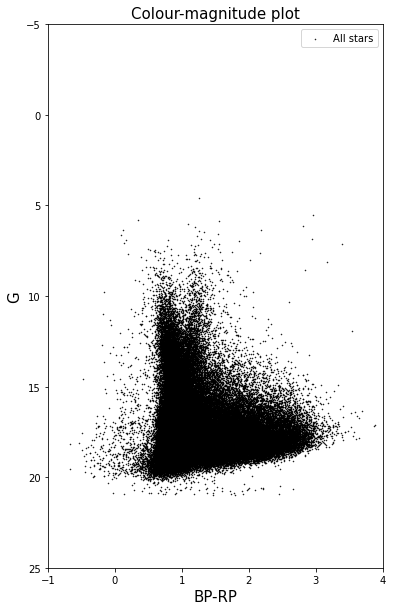

In [528]:
#possible solution
plt.figure(figsize=(6,10))

plt.scatter(all_gaia_obj['gaia_bp_mag']-all_gaia_obj['gaia_rp_mag'],all_gaia_obj['gaia_g_mag'], color='black', marker='.', s=1, label='All stars')
plt.ylim(25,-5)
plt.xlim(-1,4)
plt.xlabel('BP-RP', fontsize=15); plt.ylabel('G', fontsize=15)
plt.title('Colour-magnitude plot', fontsize=15)
plt.legend()

<p>This isn't a great imporovement on what we had before, although it is noticable that the Gaia photometry saturates at brighter magnitudes than the SDSS photometry.</p>

<p>Let's start making use of Gaia parallax measurement. To do this we will calculate the absolute magnitude of all our stars in the Gaia G band. Absolute magnitude combines both the apparent magnitude and the distance so we are left with a quantity that depends only on a star's luminosity in that filter band.</p>

In [32]:
all_gaia_obj['gaia_g_abs']=all_gaia_obj['gaia_g_mag']-5.0*np.log10(1000.0/all_gaia_obj['parallax'])+5

<h3>Exercise</h3>
<p>Now remake your colour-magnitude plot as a colour-absolute magnitude plot. You can keep the x-axis limits the same but use -5 to 20 as the limits of the y-axis.</p>

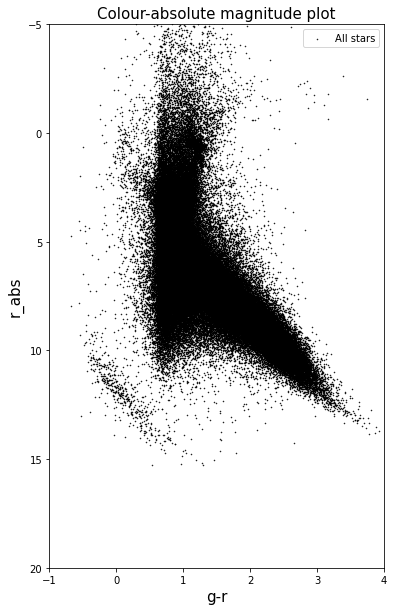

In [33]:
#possible solution
plt.figure(figsize=(6,10))

plt.scatter(all_gaia_obj['gaia_bp_mag']-all_gaia_obj['gaia_rp_mag'],all_gaia_obj['gaia_g_abs'], color='black', marker='.', s=1, label='All stars')
plt.ylim(20,-5)
plt.xlim(-1,4)
plt.xlabel('g-r', fontsize=15); plt.ylabel('r_abs', fontsize=15)
plt.title('Colour-absolute magnitude plot', fontsize=15)
plt.legend()

<p>We can see that things are starting to change. The huge blob from before has gone. Do you notice any other interesting features here?</p>

<p>But we can improve this further. Previously in the SQL query we selected object with only good Gaia photometry, but other than excluding objects with negative parallaxes we didn't make a cut on the parallax quality. Let's do that now.</p>

<h3>Exercise</h3>
<p>Create a slice in <code>all_gaia_obj</code> called <code>good_parallax_slice</code>. Select only objects there the <code>parallax</code> is at least ten times greater than the <code>parallax_error</code>.</p>

In [34]:
#possible solution
good_parallax_slice=np.where(all_gaia_obj['parallax']/all_gaia_obj['parallax_error'] > 10.0)[0]

<h3>Exercise</h3>
<p>Now replot your colour-absolute magnitude diagram.</p>

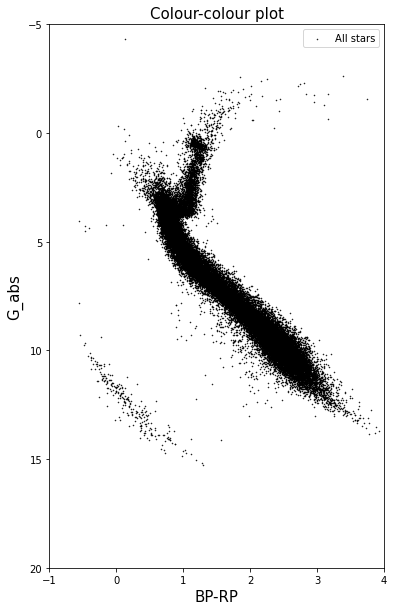

In [35]:
#possible solution
plt.figure(figsize=(6,10))

plt.scatter(all_gaia_obj.loc[good_parallax_slice,'gaia_bp_mag']-all_gaia_obj.loc[good_parallax_slice,'gaia_rp_mag'],all_gaia_obj.loc[good_parallax_slice,'gaia_g_abs'], color='black', marker='.', s=1, label='All stars')
plt.ylim(20,-5)
plt.xlim(-1,4)
plt.xlabel('BP-RP', fontsize=15); plt.ylabel('G_abs', fontsize=15)
plt.title('Colour-colour plot', fontsize=15)
plt.legend()

<p>The plot should now look much cleaner and you should be able to see a few different collections of stars.</p>
<p>What you've just plotted is known as a Herztprung-Russell Diagram. This is probably the most important plot in stellar astronomy.</p>
<p>The x-axis here is the colour which roughly scales with temperature. Bluer objects (on the left) have higher tempertures, redder objects (on the right) have lower temperatures.</p>
<p>The y-axis shows how luminous an object is with the objects with larger positive values being fainter than objects with smaller positive or even negative values. Luminousity depends most strongly on two factors: the temperature and the size of each star. </p>
<p>Stars are typically classified by spectral type and luminosity class. Spectral type follows the different features that appear in the spectrum of a star. Stars of the same spectral type have roughly the same temperature. Luminosity class divides stars of similar spectral types and temperatures into distinct categories based on their brightness. The luminosity of a star depends on its temperature and size. If we have two stars of the same temperature and colour (and hence of the same spectral type) but of a different luminosity then the brighter star will have a larger radius than the fainter star. So stars of a brighter luminosity class will be larger than stars of the same spectral type but a fainter luminosity class. </p> 
<ul>
<li>Most stars in the Galaxy lie on the "main sequence", where stars burn hydrogen in their cores. Where on the diagram you plotted do you think this main sequence lies?</li>
    <li>Looking at the diagram you plotted can you spot any brighter and/or fainter luminosity classes of stars?</li>
    <li>Look at the line of very faint objects fainter than $G_{abs}=10$ and bluer than $BP-RP=1.5$. How many magnitudes fainter than a main sequence star of the same colour are they? </li>
    <li>The absolute magnitude of a star is proportional to $10\log_{10}T + 5\log_{10}R$ where $T$ is the effective temperature and $R$ is the radius of the star. Using the magnitude difference you calculated in the previous answer, how much smaller are these faint blue objects than main sequence stars of the same temperature?</li>
    <ul>
        <li>To do this write down an equation for the magnitude of the star on the main sequence and another equation for the star on the very faint sequence.</li>
        <li>Remember that $\log_{10}x-\log{10}y=\log_{10}\frac{x}{y}$ and that if $a=\log_{10}b$ then $10^a=b$</li>
    </ul>
    <li>Let's think about the Solar System. The Sun has a radius that is about 10 times bigger than Jupiter's radius and about 100 times bigger than the Earth's. Using your answer from the previous questions, what object in the Solar System are these faint blue objects comparable in size to?</li>
    <li>Given that these faint blue object are as hot as stars, but have the size you calculated in the previous question, what type of objects do you think they are?</li>
    <li>Repeat the previous four questions but this time compare the bright red objects brighter than $G_{abs}=0$ and redder than $BP-RP=2.5$ with main sequence stars of the same colour.</li>
    <li>Note that in the Solar System the Sun's radius is about 200 times smaller than the distance between the Earth and the Sun</li>
</ul>

<b>Possible answers</b>
<ul>
    <li>The main sequence starts around (0,0) and runs until (4,13).</li>
    <li>The giants branch extends from about (1,4) and then rises up to absolute magnitudes between 0 and -3. The white dwarfs run from about (-0.5,8) to (1.5,15). You don't need to tell the students the names of these yet.</li>
    <li>The faint blue stars (white dwarfs) are about 10 magnitudes fainter than stars of the same temperature</li>
    <li>Hence they are about 100 times smaller than stars of the same temperature</li>
    <li>Hence they are about the size of Earth</li>
    <li>Students may work out that they are white dwarfs at this point. If not you may need to tell them</li>
    <li>The giants are about 5-10 magnitudes brighter than main sequence stars of the same temperature. Hence they are 10-100 times bigger. Students may work out that these are bigger than the Sun and that they are giant stars.</li>
</ul>

<h3>Start of optional section on halo stars and metallicity</h3>

<br/>
<p>There is also another factor that changes the temperature and brightness of a star, it's metal content. In astronomy metal means any element that isn't hydrogen or helium. Hence nitrogen, carbon, oxygen, magnesium and iron are all metals in an astronomical context.</p>
<p>Metals are created in the cores of stars and in supernova explosions. Each generation of stars enriching the galaxy with more metals. This means that the material new generations of stars form from gets more and more metal-rich over times. So younger stars are a lot more rich in metals than older stars. So if we want to look at stars of different metallicities we need to find stars of different ages.</p>
<p>It's pretty hard to measure the age of a star, but there is a shortcut we can take. The Milky Way is made up of several different populations of stars. In the area around the Sun, the two largest populations are disk stars and halo stars. Disk stars are younger than 10 billion years old and, like the Sun, they orbit around the galaxy in a flat disk. In the area around the Sun the disk stars are all moving, more or less, in the same direction and speed as the Sun as they go around the Galaxy. Some will be faster, some slower, some will move in slightly different directions, but they mostly follow the same orbital flow around the Galaxy. Halo stars are a much older, and hence metal-poor, population of stars. They are all older than 10 billion years old and orbit the Galaxy in randomly aligned orbits. As halo stars don't move with the general orbit of disk stars, which near the Sun is about 200 kilometres per second, then they all appear to have very high velocities relative to the Sun and to an observer on Earth.</p>
<p>Let's find out a bit about the velocities our stars are moving at by calculating the tangential velocity. This is the velocity they are moving at perpendicular to the line of sight we view them from. To do this we first calculate the total proper motion of each star by combining the proper motion in RA and Dec. Then we muliply the proper motion by a constant and by the distance.</p>

In [36]:
all_gaia_obj['pm']=np.sqrt(all_gaia_obj['pmra']*all_gaia_obj['pmra']+all_gaia_obj['pmdec']*all_gaia_obj['pmdec'])
all_gaia_obj['v_tan']=all_gaia_obj['pm']*4.74/all_gaia_obj['parallax']

<h3>Exercise</h3>
<p>Plot a histogram of tangential velocities for the stars you previously selected in the <code>good_parallax_slice</code>. Make the y-axis of the histogram with a logarithmic scale.</p>

Text(0.5, 1.0, 'Tangential velocity distribution')

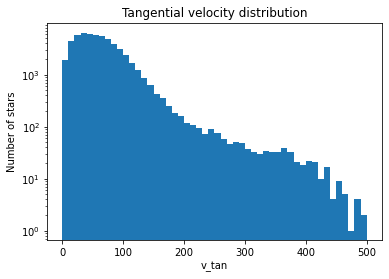

In [617]:
#possible solution
plt.hist(all_gaia_obj.loc[good_parallax_slice,'v_tan'], bins=50, range=(0.0,500.0))
plt.xlabel('v_tan')
plt.ylabel('Number of stars')
plt.yscale('log')
plt.title('Tangential velocity distribution')

<p>On your histogram where do you think the bulk of stars in the Galactic disk that are moving at low velocities relative to the Sun lie? Where do you think the halo stars moving at high velocity relative to the Sun lie? Hint, where does the histogram change shape?</p>

<h3>Exercise</h3>
<p>Select stars with both good parallaxes and a high tangential velocity. Use your previous histogram to decide where to make the cut on tangential velocity.</p>

In [37]:
#possible solution
high_v_tan_slice=np.where((all_gaia_obj['v_tan']>250)&(all_gaia_obj['parallax']/all_gaia_obj['parallax_error'] > 10.0))[0]

<h3>Exercise</h3>
<p>Plot your Herzprung-Russell diagram again. This time as well as plotting all stars in black, plot the high tangential velocity stars on top as circles with <code>size=40</code> and <code>color='goldenrod'</code></p>

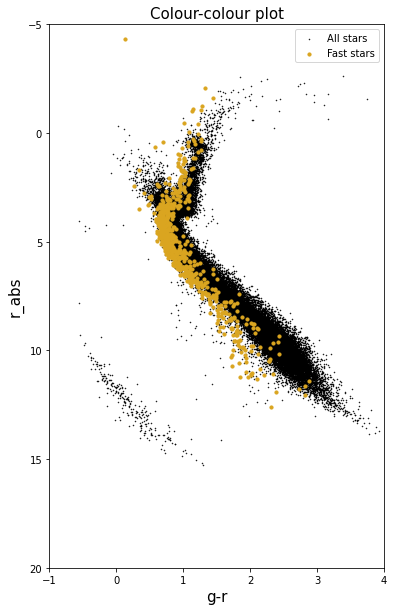

In [38]:
#possible solution
plt.figure(figsize=(6,10))

plt.scatter(all_gaia_obj.loc[good_parallax_slice,'gaia_bp_mag']-all_gaia_obj.loc[good_parallax_slice,'gaia_rp_mag'],all_gaia_obj.loc[good_parallax_slice,'gaia_g_abs'], color='black', marker='.', s=1, label='All stars')
plt.scatter(all_gaia_obj.loc[high_v_tan_slice,'gaia_bp_mag']-all_gaia_obj.loc[high_v_tan_slice,'gaia_rp_mag'],all_gaia_obj.loc[high_v_tan_slice,'gaia_g_abs'], color='goldenrod', marker='.', s=40, label='Fast stars')

plt.ylim(20,-5)
plt.xlim(-1,4)
plt.xlabel('g-r', fontsize=15); plt.ylabel('r_abs', fontsize=15)
plt.title('Colour-colour plot', fontsize=15)
plt.legend()

<p>Where do the high velocity, metal-poor halo stars lie in comparison to other stars? What can you say about the position of metal-poor stars on a Hertzprung-Russell diagram?</p>

<p><b>Possible answer:</b> The halo stars are bluer than stars of the same spectral type. It is generally true that metal poor stars are bluer than metal-rich stars</p>

<h3>End of optional section on halo stars and metallicity</h3>

<br/>
<h2>Introducing spectra</h2>
<p>Next we are going to use SDSS data to look at the spectra of stars across the Hetzprung Russell diagram (HR diagram).</p>
<p>We already have the information on which objects have SDSS spectra from our SQL query so let's select a slice for objects with SDSS spectra.</p>

In [39]:
spectra_objects_slice=np.where((all_gaia_obj['fiberid']>0)&(all_gaia_obj['parallax']/all_gaia_obj['parallax_error'] > 10.0))[0]

<h3>Exerise</h3>
<p>Plot your HR diagram with all stars as small black dots and stars with spectra as green upward pointing triangles. You don't need to plot the high velocity stars like you did in the previous plot.</h3>

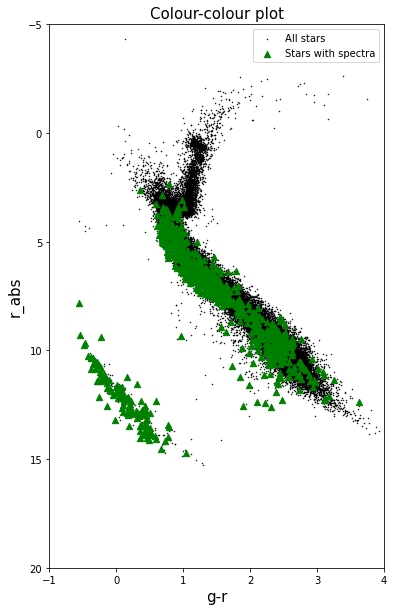

In [40]:
#possible solution
plt.figure(figsize=(6,10))

plt.scatter(all_gaia_obj.loc[good_parallax_slice,'gaia_bp_mag']-all_gaia_obj.loc[good_parallax_slice,'gaia_rp_mag'],all_gaia_obj.loc[good_parallax_slice,'gaia_g_abs'], color='black', marker='.', s=1, label='All stars')
plt.scatter(all_gaia_obj.loc[spectra_objects_slice,'gaia_bp_mag']-all_gaia_obj.loc[spectra_objects_slice,'gaia_rp_mag'],all_gaia_obj.loc[spectra_objects_slice,'gaia_g_abs'], color='green', marker='^', s=40, label='Stars with spectra')
plt.ylim(20,-5)
plt.xlim(-1,4)
plt.xlabel('g-r', fontsize=15); plt.ylabel('r_abs', fontsize=15)
plt.title('Colour-colour plot', fontsize=15)
plt.legend()

<p>Now let's make several slices of the data. This will give us samples from three different parts of the HR diagram.</p>

In [41]:
spectra_red_objects_slice=np.where((all_gaia_obj['fiberid']>0)\
                               &(all_gaia_obj['parallax']/all_gaia_obj['parallax_error'] > 10.0)\
                              &((all_gaia_obj['gaia_bp_mag']-all_gaia_obj['gaia_rp_mag'])>2.5))[0]

spectra_bright_blue_objects_slice=np.where((all_gaia_obj['fiberid']>0)\
                               &(all_gaia_obj['parallax']/all_gaia_obj['parallax_error'] > 10.0)\
                              &((all_gaia_obj['gaia_bp_mag']-all_gaia_obj['gaia_rp_mag'])<1.0)\
                               &(all_gaia_obj['gaia_g_abs']<7))[0]

spectra_faint_blue_objects_slice=np.where((all_gaia_obj['fiberid']>0)\
                               &(all_gaia_obj['parallax']/all_gaia_obj['parallax_error'] > 10.0)\
                               &(all_gaia_obj['gaia_g_abs']>(8.0+4.0*(all_gaia_obj['gaia_bp_mag']-all_gaia_obj['gaia_rp_mag']))))[0]


<h3>Exercise</h3>
<p>Remake the previous HR diagram, keeping the black dots and green triangles. This time add the red objects as red upward pointing triangles, the bright blue objects as blue upward pointing triangles and the faint blue objects as magenta upward pointing triangles.</p>

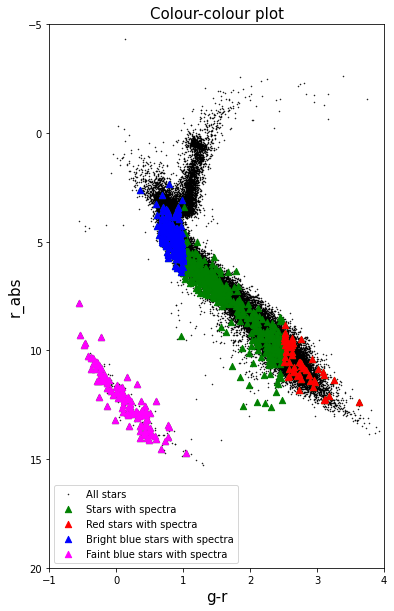

In [42]:
#possible solution
plt.figure(figsize=(6,10))

plt.scatter(all_gaia_obj.loc[good_parallax_slice,'gaia_bp_mag']-all_gaia_obj.loc[good_parallax_slice,'gaia_rp_mag'],all_gaia_obj.loc[good_parallax_slice,'gaia_g_abs'], color='black', marker='.', s=1, label='All stars')
plt.scatter(all_gaia_obj.loc[spectra_objects_slice,'gaia_bp_mag']-all_gaia_obj.loc[spectra_objects_slice,'gaia_rp_mag'],all_gaia_obj.loc[spectra_objects_slice,'gaia_g_abs'], color='green', marker='^', s=40, label='Stars with spectra')
plt.scatter(all_gaia_obj.loc[spectra_red_objects_slice,'gaia_bp_mag']-all_gaia_obj.loc[spectra_red_objects_slice,'gaia_rp_mag'],all_gaia_obj.loc[spectra_red_objects_slice,'gaia_g_abs'], color='red', marker='^', s=40, label='Red stars with spectra')
plt.scatter(all_gaia_obj.loc[spectra_bright_blue_objects_slice,'gaia_bp_mag']-all_gaia_obj.loc[spectra_bright_blue_objects_slice,'gaia_rp_mag'],all_gaia_obj.loc[spectra_bright_blue_objects_slice,'gaia_g_abs'], color='blue', marker='^', s=40, label='Bright blue stars with spectra')
plt.scatter(all_gaia_obj.loc[spectra_faint_blue_objects_slice,'gaia_bp_mag']-all_gaia_obj.loc[spectra_faint_blue_objects_slice,'gaia_rp_mag'],all_gaia_obj.loc[spectra_faint_blue_objects_slice,'gaia_g_abs'], color='magenta', marker='^', s=40, label='Faint blue stars with spectra')

plt.ylim(20,-5)
plt.xlim(-1,4)
plt.xlabel('g-r', fontsize=15); plt.ylabel('r_abs', fontsize=15)
plt.title('Colour-colour plot', fontsize=15)
plt.legend()

<p>Now we are going to look at the spectra of objects. A spectrum tells you how much light aan object gives off at a particular wavelength. Spectra will have a general shape, normally related to how red or blue and object is and will also have absorption lines from atoms, ions and molecules in their atmosphere. Spectra normally have smaller wavelength (bluer light) on the left of the x-axis and larger wavelength (redder light) on the right of the x-axis. The y-axis normally represents the flux (light energy per unit time, per unit area, per unit wavelength) at a specific wavelength.</p>
<p>Below is a short function that takes a list of objects and plots spectra for up to nine of those objects. A spectrum is a plot that shows you how much energy a star gives out at a particular wavelength.</p>

In [58]:
def plot_nine_spectra(object_list,line_list=None):
    plt.figure(figsize=(15, 15)) 
    if len(object_list)>=9:
        n_plots=9
    else:
        n_plots=len(object_list)
    ind = np.random.randint(0,len(object_list),n_plots)
    for count,obj in enumerate(ind):
        selected_obj=object_list.iloc[obj]
        if count>=9:
            break
        target_url='https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/'+selected_obj['run2d']+'/spectra/'
        if selected_obj['run2d']=='v5_13_2': 
            target_url=target_url+'lite/'
        
        target_url=target_url+str(int(selected_obj['plate'])).zfill(4)+'/spec-'+str(int(selected_obj['plate'])).zfill(4)\
        +'-'+str(int(selected_obj['mjd']))+'-'+str(int(selected_obj['fiberid'])).zfill(4)+'.fits'
        print('loading: ',target_url)
        fits_obj = fits.open(target_url)
        
        print('downloaded '+target_url)
        spectrum_data = fits_obj[1].data
        header = fits_obj[1].header
        flux = [x[0] for x in spectrum_data]
        wavelength= [10.0**x[1] for x in spectrum_data]
        plt.subplot(3,3,count+1)
        
        if line_list:
            for line in line_list:
                plt.plot([line,line],[0.0,1.2*max(flux)],color='red',linestyle='--')
        plt.plot(wavelength,flux)
        plt.ylabel('flux')
        plt.xlabel('wavelength (Angstroms)')
        plt.ylim((0.9*min(flux),1.1*max(flux)))
        plt.title('plate=`'+str(int(selected_obj['plate']))+' mjd='+str(int(selected_obj['mjd']))\
                  +' fiberid='+str(int(selected_obj['fiberid'])))
    plt.show()

<p>Execute the bit of code in the next cell to plot the spectra of some of the bright blue objects.</p>

loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2895/spec-2895-54567-0556.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2895/spec-2895-54567-0556.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-2892-54552-0365.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-2892-54552-0365.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/104/spectra/3255/spec-3255-54885-0272.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/104/spectra/3255/spec-3255-54885-0272.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/104/spectra/3172/spec-3172-54863-0089.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/104/spectra/3172/spec-3172-54863-0089.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-2892-54552-0372.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-28

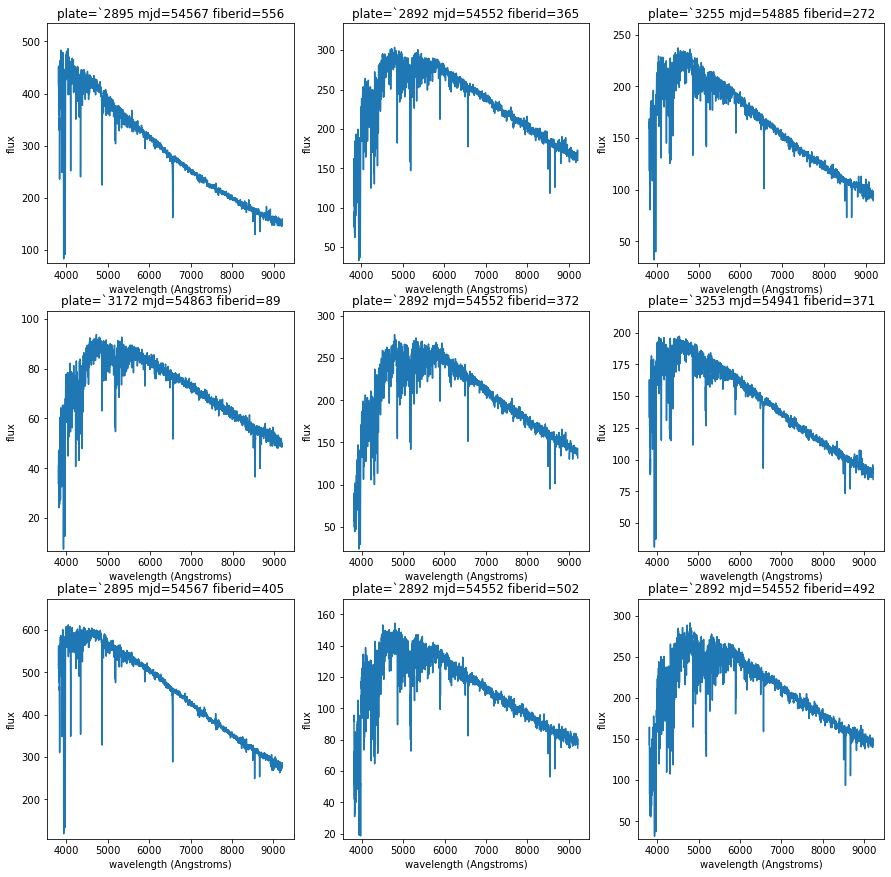

In [59]:
plot_nine_spectra(all_gaia_obj.loc[spectra_bright_blue_objects_slice])

<p>Have a look at the spectra you just made.</p>
<ul>
<li>What is the general shape of the spectra?</li>
<li>Can you spot any sharp features in the spectra?</li>
</ul>

<p><b>Possible answers:</b></p>
<ul>
    <li>More energy at the blue end of the spectrum</li>
    <li>Students might spot absorption lines</li>
</ul>
<br/>
<p>Stars have lots of different chemical elements in them although they are mostly composed of hydrogen and helium. Atoms and ions in the atmosphere of a star are picky eaters. Light coming up from hotter parts of the star passes through the star's atmosphere and the atoms and ions in the star's atmosphere take little nibbles out of the light at specific wavelengths. These are known as absorption lines. Atoms and ions only take these nibbles at specific temperatures so two stars with an identical chemical composition but a different temperature (and hence different colour and spectral type) will have different patterns of absorption lines.</p>
<br/>
<p>Let's take a look at hydrogen lines. Hydrogen lines appear in the ultraviolet, in visible light and the infrared. In visible light, where SDSS spectra are taken, the main lines from hydrogen are called the Balmer lines. Let's define those in the code block below.</p>

In [47]:
balmer_lines=[6562.79,4861.35,4340.472,4101.734]

<h3>Exercise</h3>
<p>Use the <code>line_list</code> keyword in <code>plot_nine_spectra</code> to add the locations of Balmer lines to your spectra of the bright blue objects</p>

loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/0286/spec-0286-51999-0607.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/0286/spec-0286-51999-0607.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2558/spec-2558-54140-0472.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2558/spec-2558-54140-0472.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-2892-54552-0518.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-2892-54552-0518.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/104/spectra/3253/spec-3253-54941-0449.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/104/spectra/3253/spec-3253-54941-0449.fits
loading:  https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-2892-54552-0535.fits
downloaded https://data.sdss.org/sas/dr17/env/SPECTRO_REDUX/26/spectra/2892/spec-2892

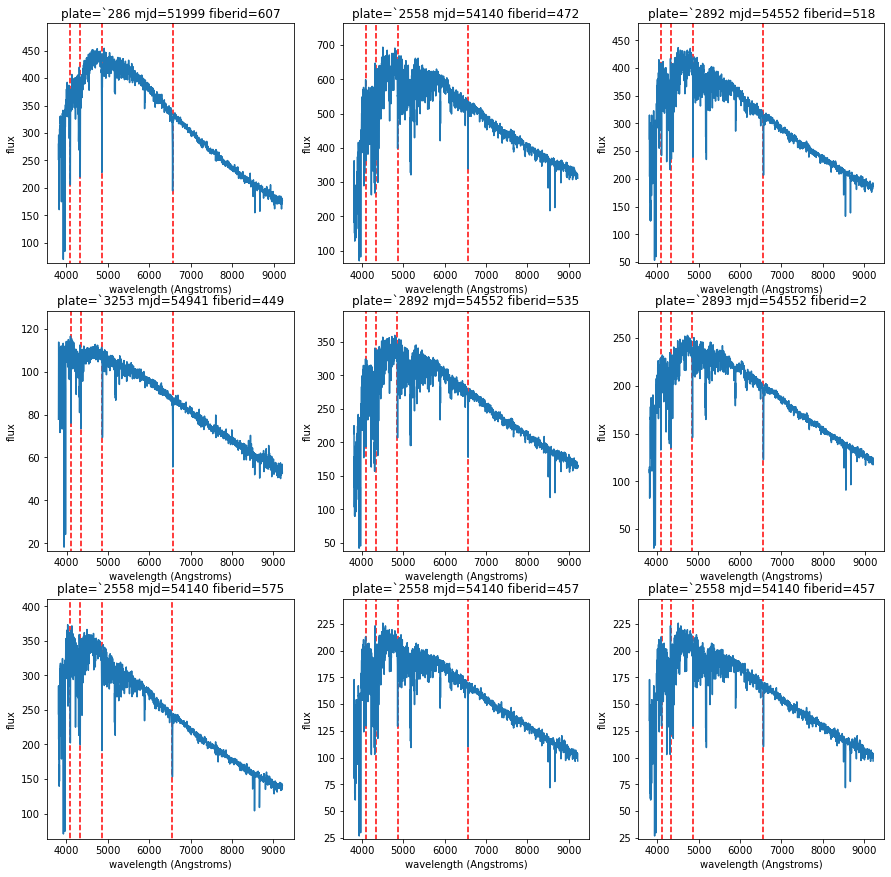

In [60]:
plot_nine_spectra(all_gaia_obj.loc[spectra_bright_blue_objects_slice],balmer_lines)

<ul>
    <li>Do the spectra of the bright blue stars show absorption lines from hydrogen?</li>
</ul>

<p><b>possible answer:</b> yes, there clearly are Balmer absorption lines</p>


<br/>
<p>Now let's look at the spectra of the faint blue objects</p>
<h3>Exercise</h3>
<p>Repeat the plot above, but use the faint blue objects slice we previously made. Keep the balmer lines in the plots.</p>


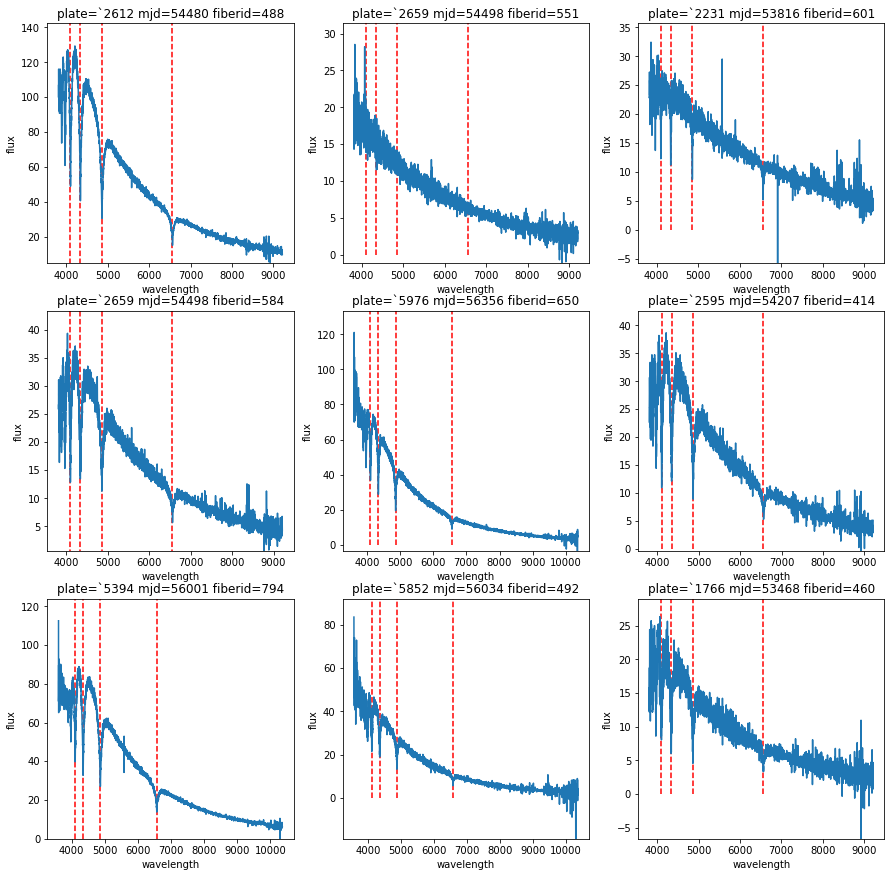

In [451]:
plot_nine_spectra(all_gaia_obj.loc[spectra_faint_blue_objects_slice],balmer_lines)

<ul>
<li>Do the faint blue objects have absorption lines from hydrogen?</li>
    <li>Do you notice anything different about the spectra a the balmer lines?</li>
</ul>
<p><b>Possible answers:</b></p>
<ul>
    <li>Yes, most do, some may be featureless</li>
    <li>Students may spot the broader hydrogen lines in some white dwarf spectra. This is likely due to these being white dwarfs with high gravity and hence high pressure atmospheres</li>
</ul>
<br/>
<p>Next we turn to the red objects.</p>
<h3>Exercise</h3>
<p>Again run <code>plot_nine_spectra</code> but this time use the red objects selection we previously made</p>

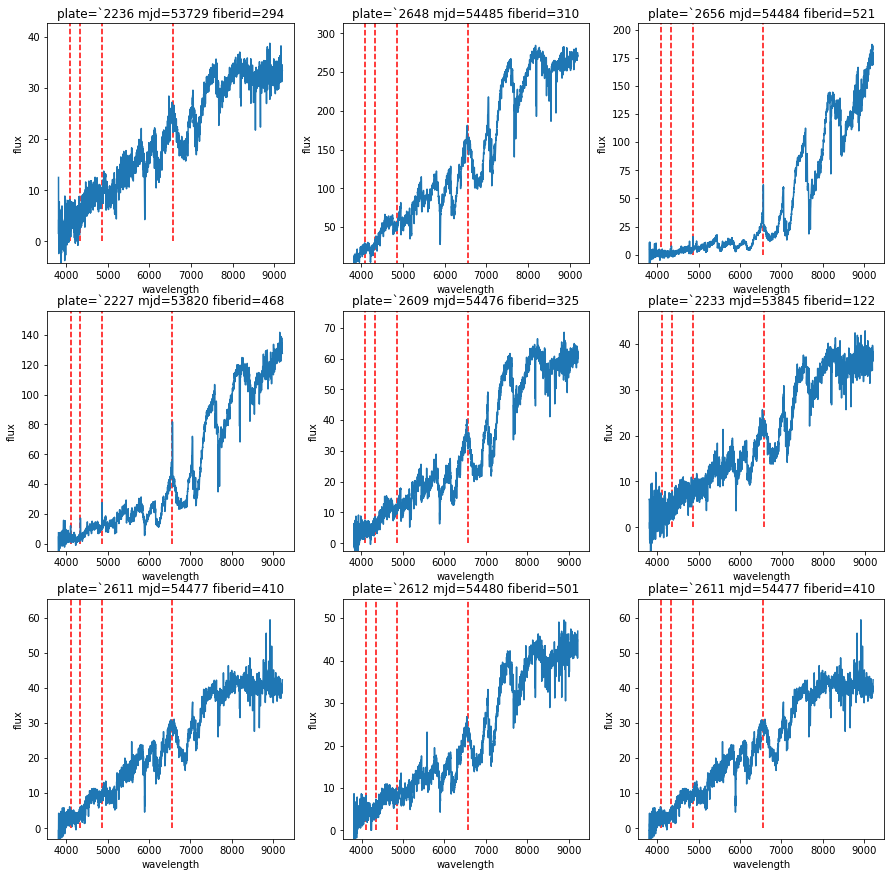

In [452]:
plot_nine_spectra(all_gaia_obj.loc[spectra_red_objects_slice],balmer_lines)

<ul>
    <li>What is the general shape of the spectra and how does it compare to the shape you saw in the selections of blue objects from earlier?</li>
    <li>Do these red objects have absorption lines at the hydrogen?</li>
    <li>Do you see anything else happening at any of the lines of the Balmer series?</li>
    <li>Do you see anything that migt be other absorption features? Do they look like little nibbles in the spectra? What do you think could be causing them?</li>
</ul>

<p><b>possible answers:</b></p>
<ul>
    <li>more light at the red end of the spectrum, different from the blue objects</li>
    <li>No hydrogen lines</li>
    <li>Some may have H-alpha emission at 6563A. This is caused by stellar activity</li>
    <li>There are several broad absorption features due to molecules (Titanium Oxide and Vanadium Oxide)</li>
</ul>

<p>Congratulations, you've made it to the end of this notebook. The topics you met here: extracting data via an SQL query, cleaning that data up, plotting it and then looking at subsamples are all essential skills for modern data science. From the astronomy side of things you've encountered colours, magnitudes, the Hertzprung-Russell diagram, luminosity classes, metallicity and basic spectroscopy.</p>